In [32]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from losses import *
from plots import *
from EDA import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = "../data/train.csv"
data_y, data_set, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [3]:
# Fixing the seed
seed = 8

### Split and classify data

In [4]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)

In [5]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set)

In [6]:
max_degree = 6

# Class 0

#### Logistic regression

***

In [7]:
# Setting parameters
param_least_0 = Parameters()
param_least_0.set_degree(max_degree)
param_least_0.set_method(least_squares)
param_least_0.set_viz(False)
param_least_0.set_use_backward_selection(False)
param_least_0.set_use_interactions(True)
# Cross validation
param_least_0 = cross_validation_poly_gas(y_0, class_0, param_least_0)

print(param_least_0.feature_list)
print(param_least_0.polynomial_selection)
print(param_least_0.best_error)
print(param_least_0.kept_interactions)

Forward step
Backward step
Interactions step
forward:  14.811083123425693
backward:  100
[[0. 0. 2. 3. 4. 8. 1. 6. 7. 8. 9. 2. 4. 7. 1. 3. 4. 4. 8. 9. 0. 1.]
 [0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 4. 4. 4. 5. 5. 5. 6. 6.]]
Forward
14.811083123425693
[[0. 3.]
 [0. 7.]]


#### Gradient descent

***

In [8]:
# Setting parameters
param_GD_0 = Parameters()
param_GD_0.set_degree(max_degree)
param_GD_0.set_method(least_squares_GD)
param_GD_0.set_to_test(['gamma'])
param_GD_0.set_viz(False)
param_GD_0.set_use_backward_selection(False)
param_GD_0.set_use_interactions(True)
# Cross validation
param_GD_0 = cross_validation_poly_gas(y_0, class_0, param_GD_0)

print(param_GD_0.feature_list)
print(param_GD_0.polynomial_selection)
print(param_GD_0.best_error)
print(param_GD_0.kept_interactions)

Forward step


/Users/gaspardvilla/Documents/EPFL/5ème année/Semestre IX/Machine Learning/Workspace/Project 1/scripts/implementations.py:42: RuntimeWarning: invalid value encountered in subtract
  w = w - (parameters.gamma * grad)


Backward step
Interactions step
forward:  16.675062972292192
backward:  100
[[0. 0. 1. 3. 4. 5. 8. 1. 2. 3. 4. 6. 7.]
 [0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]]
Forward
16.675062972292192
[0. 0.]


#### Stochastic Gradient Descent

***

In [9]:
# Setting parameters
param_SGD_0 = Parameters()
param_SGD_0.set_degree(max_degree)
param_SGD_0.set_method(least_squares_SGD)
param_SGD_0.set_to_test(['gamma'])
param_SGD_0.set_viz(False)
param_SGD_0.set_use_backward_selection(False)
param_SGD_0.set_use_interactions(True)
# Cross validation
param_SGD_0 = cross_validation_poly_gas(y_0, class_0, param_SGD_0)

print(param_SGD_0.feature_list)
print(param_SGD_0.polynomial_selection)
print(param_SGD_0.best_error)
print(param_SGD_0.kept_interactions)

Forward step
Backward step
Interactions step
forward:  20.0
backward:  100
[[0. 0. 1. 4. 8.]
 [0. 1. 1. 1. 1.]]
Forward
20.0
[0. 0.]


#### Ridge Regression

***

In [99]:
# Setting parameters
param_ridge_0 = Parameters()
param_ridge_0.set_degree(max_degree)
param_ridge_0.set_method(ridge_regression)
param_ridge_0.set_to_test(['lambda'])
param_ridge_0.set_viz(False)
param_ridge_0.set_use_backward_selection(False)
param_ridge_0.set_use_interactions(True)
# Cross validation
param_ridge_0 = cross_validation_poly_gas(y_0, class_0, param_ridge_0)

print(param_ridge_0.feature_list)
print(param_ridge_0.polynomial_selection)
print(param_ridge_0.best_error)
print(param_ridge_0.kept_interactions)
print(param_ridge_0.best_lambda)

Forward step
Backward step
Interactions step
forward:  16.74673712867323
backward:  100
[[0. 0. 1. 3. 4. 6. 7. 8. 0. 1. 2. 5. 6. 7. 9. 1. 3. 4. 5. 9. 1. 2. 3. 4.
  5. 6. 7. 9. 1. 3. 5. 7. 8. 9. 2. 7. 8. 9.]
 [0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4.
  4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6.]]
Forward
16.74673712867323
[[0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 3. 3. 4. 5. 5. 5. 5. 6. 7.]
 [0. 1. 2. 8. 9. 3. 4. 5. 6. 9. 5. 9. 7. 6. 7. 8. 9. 7. 8.]]
0.00013738237958832637


#### Logistic regression

***

In [11]:
# Setting parameters
neg_log = Neg_log()
param_log_0 = Parameters()
param_log_0.set_degree(max_degree)
param_log_0.set_method(logistic_regression)
param_log_0.set_loss_fct(neg_log)
param_log_0.set_to_test(['gamma'])
param_log_0.set_viz(False)
param_log_0.set_use_backward_selection(False)
param_log_0.set_use_interactions(True)
# Cross validation
param_log_0 = cross_validation_poly_gas(y_0, class_0, param_log_0)

print(param_log_0.feature_list)
print(param_log_0.polynomial_selection)
print(param_log_0.best_error)
print(param_log_0.kept_interactions)

Forward step


/Users/gaspardvilla/Documents/EPFL/5ème année/Semestre IX/Machine Learning/Workspace/Project 1/scripts/losses.py:76: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(data_set@w))-y*(data_set@w))
/Users/gaspardvilla/Documents/EPFL/5ème année/Semestre IX/Machine Learning/Workspace/Project 1/scripts/losses.py:65: RuntimeWarning: overflow encountered in exp
  return np.exp(t) / (1 + np.exp(t))
/Users/gaspardvilla/Documents/EPFL/5ème année/Semestre IX/Machine Learning/Workspace/Project 1/scripts/losses.py:65: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(t) / (1 + np.exp(t))


Backward step
Interactions step
forward:  15.667506297229219
backward:  100
[[0. 0. 1. 3. 4. 8. 0. 1. 7. 8.]
 [0. 1. 1. 1. 1. 1. 2. 2. 2. 2.]]
Forward
15.667506297229219
[0. 0.]


#### Reguralized Logistic regression

***

In [12]:
# Setting parameters
neg_log = Neg_log()
param_reg_0 = Parameters()
param_reg_0.set_degree(max_degree)
param_reg_0.set_method(reg_logistic_regression)
param_reg_0.set_loss_fct(neg_log)
param_reg_0.set_to_test(['gamma', 'lambda'])
param_reg_0.set_viz(False)
param_reg_0.set_use_backward_selection(False)
param_reg_0.set_use_interactions(True)
# Cross validation
param_reg_0 = cross_validation_poly_gas(y_0, class_0, param_reg_0)

print(param_reg_0.feature_list)
print(param_reg_0.polynomial_selection)
print(param_reg_0.best_error)
print(param_reg_0.kept_interactions)

Forward step
Backward step
Interactions step
forward:  15.667506297229219
backward:  100
[[0. 0. 1. 3. 4. 8. 0. 1. 7. 8.]
 [0. 1. 1. 1. 1. 1. 2. 2. 2. 2.]]
Forward
15.667506297229219
[0. 0.]


# Class 1

***

In [ ]:
# Setting parameters
param_least_1 = Parameters()
param_least_1.set_degree(max_degree)
param_least_1.set_method(least_squares)
param_least_1.set_viz(False)
param_least_1.set_use_backward_selection(False)
param_least_1.set_use_interactions(True)
# Cross validation
param_least_1 = cross_validation_poly_gas(y_1, class_1, param_least_1)

print(param_least_1.feature_list)
print(param_least_1.polynomial_selection)
print(param_least_1.best_error)
print(param_least_1.kept_interactions)

In [ ]:
# Setting parameters
param_GD_1 = Parameters()
param_GD_1.set_degree(max_degree)
param_GD_1.set_method(least_squares_GD)
param_GD_1.set_to_test(['gamma'])
param_GD_1.set_viz(False)
param_GD_1.set_use_backward_selection(False)
param_GD_1.set_use_interactions(True)
# Cross validation
param_GD_1 = cross_validation_poly_gas(y_1, class_1, param_GD_1)

print(param_GD_1.feature_list)
print(param_GD_1.polynomial_selection)
print(param_GD_1.best_error)
print(param_GD_1.kept_interactions)

In [ ]:
# Setting parameters
param_SGD_1 = Parameters()
param_SGD_1.set_degree(max_degree)
param_SGD_1.set_method(least_squares_SGD)
param_SGD_1.set_to_test(['gamma'])
param_SGD_1.set_viz(False)
param_SGD_1.set_use_backward_selection(False)
param_SGD_1.set_use_interactions(True)
# Cross validation
param_SGD_1 = cross_validation_poly_gas(y_1, class_1, param_SGD_1)

print(param_SGD_1.feature_list)
print(param_SGD_1.polynomial_selection)
print(param_SGD_1.best_error)
print(param_SGD_1.kept_interactions)

In [ ]:
# Setting parameters
param_ridge_1 = Parameters()
param_ridge_1.set_degree(max_degree)
param_ridge_1.set_method(ridge_regression)
param_ridge_1.set_to_test(['lambda'])
param_ridge_1.set_viz(False)
param_ridge_1.set_use_backward_selection(False)
param_ridge_1.set_use_interactions(True)
# Cross validation
param_ridge_1 = cross_validation_poly_gas(y_1, class_1, param_ridge_1)

print(param_ridge_1.feature_list)
print(param_ridge_1.polynomial_selection)
print(param_ridge_1.best_error)
print(param_ridge_1.kept_interactions)

In [ ]:
# Setting parameters
neg_log = Neg_log()
param_log_1 = Parameters()
param_log_1.set_degree(max_degree)
param_log_1.set_method(logistic_regression)
param_log_1.set_loss_fct(neg_log)
param_log_1.set_to_test(['gamma'])
param_log_1.set_viz(False)
param_log_1.set_use_backward_selection(False)
param_log_1.set_use_interactions(True)
# Cross validation
param_log_1 = cross_validation_poly_gas(y_1, class_1, param_log_1)

print(param_log_1.feature_list)
print(param_log_1.polynomial_selection)
print(param_log_1.best_error)
print(param_log_1.kept_interactions)

In [ ]:
# Setting parameters
neg_log = Neg_log()
param_reg_1 = Parameters()
param_reg_1.set_degree(max_degree)
param_reg_1.set_method(reg_logistic_regression)
param_reg_1.set_loss_fct(neg_log)
param_reg_1.set_to_test(['gamma', 'lambda'])
param_reg_1.set_viz(False)
param_reg_1.set_use_backward_selection(False)
param_reg_1.set_use_interactions(True)
# Cross validation
param_reg_1 = cross_validation_poly_gas(y_1, class_1, param_reg_1)

print(param_reg_1.feature_list)
print(param_reg_1.polynomial_selection)
print(param_reg_1.best_error)
print(param_reg_1.kept_interactions)

# Class 2

***

In [ ]:
print('LEAST SQUARES')

# Setting parameters
param_least_2 = Parameters()
param_least_2.set_degree(max_degree)
param_least_2.set_method(least_squares)
param_least_2.set_viz(False)
param_least_2.set_use_backward_selection(False)
param_least_2.set_use_interactions(True)
# Cross validation
param_least_2 = cross_validation_poly_gas(y_2, class_2, param_least_2)

print(param_least_2.feature_list)
print(param_least_2.polynomial_selection)
print(param_least_2.best_error)
print(param_least_2.kept_interactions)

print('GRADIENT DESCENT')

# Setting parameters
param_GD_2 = Parameters()
param_GD_2.set_degree(max_degree)
param_GD_2.set_method(least_squares_GD)
param_GD_2.set_to_test(['gamma'])
param_GD_2.set_viz(False)
param_GD_2.set_use_backward_selection(False)
param_GD_2.set_use_interactions(True)
# Cross validation
param_GD_2 = cross_validation_poly_gas(y_2, class_2, param_GD_2)

print(param_GD_2.feature_list)
print(param_GD_2.polynomial_selection)
print(param_GD_2.best_error)
print(param_GD_2.kept_interactions)

print('STOCHASTIC GRADIENT DESCENT')

# Setting parameters
param_SGD_2 = Parameters()
param_SGD_2.set_degree(max_degree)
param_SGD_2.set_method(least_squares_SGD)
param_SGD_2.set_to_test(['gamma'])
param_SGD_2.set_viz(False)
param_SGD_2.set_use_backward_selection(False)
param_SGD_2.set_use_interactions(True)
# Cross validation
param_SGD_2 = cross_validation_poly_gas(y_2, class_2, param_SGD_2)

print(param_SGD_2.feature_list)
print(param_SGD_2.polynomial_selection)
print(param_SGD_2.best_error)
print(param_SGD_2.kept_interactions)

print('RIDGE REGRESSION')

# Setting parameters
param_ridge_2 = Parameters()
param_ridge_2.set_degree(max_degree)
param_ridge_2.set_method(ridge_regression)
param_ridge_2.set_to_test(['lambda'])
param_ridge_2.set_viz(False)
param_ridge_2.set_use_backward_selection(False)
param_ridge_2.set_use_interactions(True)
# Cross validation
param_ridge_2 = cross_validation_poly_gas(y_2, class_2, param_ridge_2)

print(param_ridge_2.feature_list)
print(param_ridge_2.polynomial_selection)
print(param_ridge_2.best_error)
print(param_ridge_2.kept_interactions)

print('LOGISTIC REGRESSION')

# Setting parameters
neg_log = Neg_log()
param_log_2 = Parameters()
param_log_2.set_degree(max_degree)
param_log_2.set_method(logistic_regression)
param_log_2.set_loss_fct(neg_log)
param_log_2.set_to_test(['gamma'])
param_log_2.set_viz(False)
param_log_2.set_use_backward_selection(False)
param_log_2.set_use_interactions(True)
# Cross validation
param_log_2 = cross_validation_poly_gas(y_2, class_2, param_log_2)

print(param_log_2.feature_list)
print(param_log_2.polynomial_selection)
print(param_log_2.best_error)
print(param_log_2.kept_interactions)

print('REGURALIZED LOGISTIC REGRESSION')

# Setting parameters
neg_log = Neg_log()
param_reg_2 = Parameters()
param_reg_2.set_degree(max_degree)
param_reg_2.set_method(reg_logistic_regression)
param_reg_2.set_loss_fct(neg_log)
param_reg_2.set_to_test(['gamma', 'lambda'])
param_reg_2.set_viz(False)
param_reg_2.set_use_backward_selection(False)
param_reg_2.set_use_interactions(True)
# Cross validation
param_reg_2 = cross_validation_poly_gas(y_2, class_2, param_reg_2)

print(param_reg_2.feature_list)
print(param_reg_2.polynomial_selection)
print(param_reg_2.best_error)
print(param_reg_2.kept_interactions)

# Class 3

***

In [13]:
print('LEAST SQUARES')

# Setting parameters
param_least_3 = Parameters()
param_least_3.set_degree(max_degree)
param_least_3.set_method(least_squares)
param_least_3.set_viz(False)
param_least_3.set_use_backward_selection(False)
param_least_3.set_use_interactions(True)
# Cross validation
param_least_3 = cross_validation_poly_gas(y_3, class_3, param_least_3)

print(param_least_3.feature_list)
print(param_least_3.polynomial_selection)
print(param_least_3.best_error)
print(param_least_3.kept_interactions)

print('GRADIENT DESCENT')

# Setting parameters
param_GD_3 = Parameters()
param_GD_3.set_degree(max_degree)
param_GD_3.set_method(least_squares_GD)
param_GD_3.set_to_test(['gamma'])
param_GD_3.set_viz(False)
param_GD_3.set_use_backward_selection(False)
param_GD_3.set_use_interactions(True)
# Cross validation
param_GD_3 = cross_validation_poly_gas(y_3, class_3, param_GD_3)

print(param_GD_3.feature_list)
print(param_GD_3.polynomial_selection)
print(param_GD_3.best_error)
print(param_GD_3.kept_interactions)

print('STOCHASTIC GRADIENT DESCENT')

# Setting parameters
param_SGD_3 = Parameters()
param_SGD_3.set_degree(max_degree)
param_SGD_3.set_method(least_squares_SGD)
param_SGD_3.set_to_test(['gamma'])
param_SGD_3.set_viz(False)
param_SGD_3.set_use_backward_selection(False)
param_SGD_3.set_use_interactions(True)
# Cross validation
param_SGD_3 = cross_validation_poly_gas(y_3, class_3, param_SGD_3)

print(param_SGD_3.feature_list)
print(param_SGD_3.polynomial_selection)
print(param_SGD_3.best_error)
print(param_SGD_3.kept_interactions)

print('RIDGE REGRESSION')

# Setting parameters
param_ridge_3 = Parameters()
param_ridge_3.set_degree(max_degree)
param_ridge_3.set_method(ridge_regression)
param_ridge_3.set_to_test(['lambda'])
param_ridge_3.set_viz(False)
param_ridge_3.set_use_backward_selection(False)
param_ridge_3.set_use_interactions(True)
# Cross validation
param_ridge_3 = cross_validation_poly_gas(y_3, class_3, param_ridge_3)

print(param_ridge_3.feature_list)
print(param_ridge_3.polynomial_selection)
print(param_ridge_3.best_error)
print(param_ridge_3.kept_interactions)

print('LOGISTIC REGRESSION')

# Setting parameters
neg_log = Neg_log()
param_log_3 = Parameters()
param_log_3.set_degree(max_degree)
param_log_3.set_method(logistic_regression)
param_log_3.set_loss_fct(neg_log)
param_log_3.set_to_test(['gamma'])
param_log_3.set_viz(False)
param_log_3.set_use_backward_selection(False)
param_log_3.set_use_interactions(True)
# Cross validation
param_log_3 = cross_validation_poly_gas(y_3, class_3, param_log_3)

print(param_log_3.feature_list)
print(param_log_3.polynomial_selection)
print(param_log_3.best_error)
print(param_log_3.kept_interactions)

print('REGURALIZED LOGISTIC REGRESSION')

# Setting parameters
neg_log = Neg_log()
param_reg_3 = Parameters()
param_reg_3.set_degree(max_degree)
param_reg_3.set_method(reg_logistic_regression)
param_reg_3.set_loss_fct(neg_log)
param_reg_3.set_to_test(['gamma', 'lambda'])
param_reg_3.set_viz(False)
param_reg_3.set_use_backward_selection(False)
param_reg_3.set_use_interactions(True)
# Cross validation
param_reg_3 = cross_validation_poly_gas(y_3, class_3, param_reg_3)

print(param_reg_3.feature_list)
print(param_reg_3.polynomial_selection)
print(param_reg_3.best_error)
print(param_reg_3.kept_interactions)

LEAST SQUARES
Forward step
Backward step
Interactions step
forward:  22.790697674418603
backward:  100
[[ 0.  0.  1.  3.  4.  2.  3.  4.  5.  6. 12.  1.  2.]
 [ 0.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  3.  3.]]
Forward
22.790697674418603
[0. 0.]
GRADIENT DESCENT
Forward step
Backward step
Interactions step
forward:  22.790697674418606
backward:  100
[[0. 0. 1. 2. 3. 4. 2. 3. 5. 6. 1. 2. 6. 7.]
 [0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]]
Forward
22.790697674418606
[0. 0.]
STOCHASTIC GRADIENT DESCENT
Forward step
Backward step
Interactions step
forward:  26.51162790697675
backward:  100
[[ 0.  0.  8.  9. 12. 11. 12.]
 [ 0.  1.  1.  1.  1.  2.  2.]]
Forward
26.51162790697675
[0. 0.]
RIDGE REGRESSION
Forward step
Backward step
Interactions step
forward:  22.325581395348838
backward:  100
[[ 0.  0.  1.  2.  3.  4.  2.  3.  5.  6. 12.  1.  2.  4.]
 [ 0.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.]]
Forward
22.325581395348838
[0. 0.]
LOGISTIC REGRESSION
Forward step
Backward step

# Submission

#### Find the best parameters for each model

****

In [92]:
DATA_TRAIN_PATH = "../data/train.csv"
data_y_, data_set_, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y_, data_set_)
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set_)

In [93]:
Viz = True

In [100]:
class_0_ = build_polynomial_features(class_0, param_ridge_0)
param_ridge_0 = cross_validation(y_0, class_0_, param_ridge_0)
loss_0, w_0 = ridge_regression(y_0, class_0_, param_ridge_0)

print(param_ridge_0.best_lambda)

0.0002592943797404667


[0. 0.]
[23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.857175090252706, 23.85830324909747, 23.85830324909747, 23.854918772563174, 23.852662454873645, 23.856046931407942, 23.852662454873645, 23.85604693140794, 23.85943140794224, 23.85379061371841, 23.85379061371841, 23.868456678700362, 23.886507220216608, 23.90907039711191, 24.013989169675092, 24.12342057761733, 24.276850180505413, 24.535198555956676, 24.99210288808664, 25.562951263537904, 26.180054151624553]
Test error: 23.79061371841155
Best lambda: 1e-07


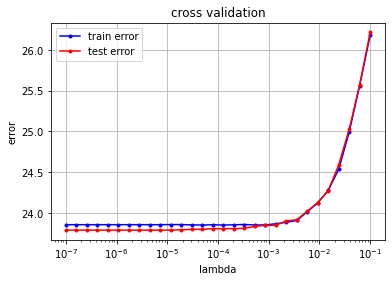

In [74]:
print(param_ridge_3.kept_interactions)
class_3_ = build_polynomial_features(class_3, param_ridge_3)
param_ridge_3.set_viz(Viz)
param_ridge_3.set_lambda_range(np.logspace(-7, -1, 30))
param_ridge_3 = cross_validation(y_3, class_3_, param_ridge_3)
loss_3, w_3 = ridge_regression(y_3, class_3_, param_ridge_3)

In [69]:
x = [-1]
for i in range(3):
    x = np.c_[x, [i]]
    print(x)

[[-1  0]]
[[-1  0  1]]
[[-1  0  1  2]]
